# Setup and Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
import warnings
import london_data_functions as ldf
from sklearn.model_selection import train_test_split

# Get the Data

In [2]:
%%time
query = """
            SELECT incident_number, timestamp_of_call, incident_group, property_category, 
                    property_type, address_qualifier, borough_name, ward_name, 
                    first_pump_arriving_attendance_time as first_time, first_pump_arriving_deployed_from_station as first_station,
                    num_stations_with_pumps_attending as station_pumps, num_pumps_attending as pumps_attending,
                    FROM `gdac-327115.LondonFire.fire_brigade`
        """

london = ldf.fetch_london_data(query_string=query, project_id = "gdac-327115", location = "eu")

Wall time: 8.75 s


# Split the Data into Training and Test Sets

In [3]:
london, _ = train_test_split(london, test_size = .16, stratify = london["incident_group"], random_state = 42)

# Clean the Data

In [4]:
warnings.filterwarnings('ignore')
london = ldf.clean_london(london)

Cleaning London Data Started...

Sucessfully Added Emergency Column!
Sucessfully Added Month Column!
Sucessfully Added Hour Column!
Sucessfully Cleanded Property Category!
Sucessfully Cleaned and Ranked Property Type!
Sucessfully Cleaned Address!
Sucessfully Cleaned Borough Names!
Sucessfully Cleaned and Ranked Ward Names!
Sucessfully Imputed Station Names!
Sucessfully Ranked Stations!
Sucessfully Cleaned Station Arriving Time!
Sucessfully Cleaned Number of Stations with Pumps!
Sucessfully Cleaned Number of Pumps Attending!
Sucessfully Dropped Unecessary Columns!

Sucessfully Cleaned London Data!


# Visualizations

Since we are interested in predicting real emergencies, we'll focus on the percentage of emergencies not just the raw count.

## Emergency Percentage

In [6]:
emer_grp = london["Emergency"].value_counts() / london.shape[0]
emer_grp = pd.DataFrame(emer_grp).reset_index().rename(columns={"index": "Emergency", "Emergency": "Percentage"})
emer_grp["Emergency"] = ["Real", "False Alarm"]
emer_grp

,Emergency,Percentage
0,Real,0.510461
1,False Alarm,0.489539


Text(0.5, 0, 'Emergency Status')

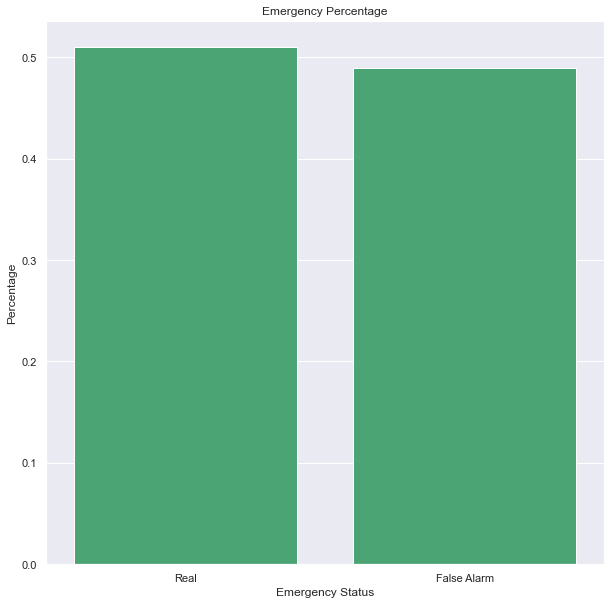

In [7]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,10)})
sns.barplot(x="Emergency", y = "Percentage", order = emer_grp["Emergency"] \
                                            , data = emer_grp, color = "mediumseagreen")
plt.title("Emergency Percentage")
plt.ylabel("Percentage")
plt.xlabel("Emergency Status")

## Month

### Percentage of Months Contributing to Real Emergencies

In [8]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

mth_by_emer = london.loc[mask, "Month"].value_counts() / london[mask].shape[0] * 100

mth_by_emer = pd.DataFrame(mth_by_emer).reset_index().rename(columns ={"index": "Month", "Month" : "Percentage"})
mth_by_emer

,Month,Percentage
0,4,29.107706
1,3,24.950510
2,1,23.755407
3,2,22.186377


Text(0.5, 0, 'Percentage')

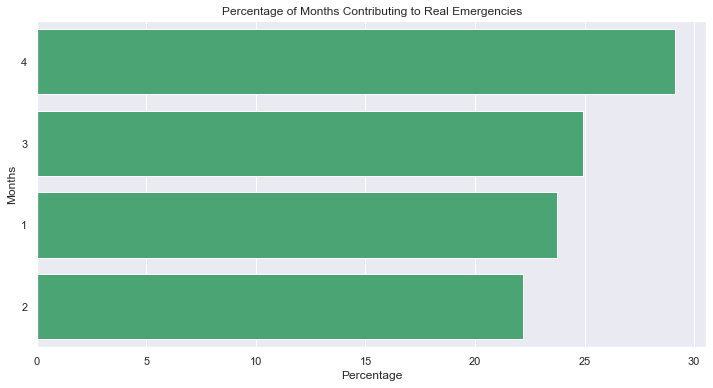

In [9]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(12,6)})
sns.barplot(x="Percentage", y = "Month", order = mth_by_emer["Month"] \
                                            , data = mth_by_emer, color = "mediumseagreen")
plt.title("Percentage of Months Contributing to Real Emergencies")
plt.ylabel("Months")
plt.xlabel("Percentage")

### Emergency Percentage by Month

In [10]:
mth_grp = london.groupby("Month")["Emergency"].aggregate(["mean", "sum"])
mth_grp = mth_grp.reset_index().sort_values(by = "Month", ascending=True)
mth_grp["mean"] *= 100
mth_grp

,Month,mean,sum
0,1,47.423888,3240
1,2,50.000000,3026
2,3,51.552795,3403
3,4,54.879735,3970


Text(0.5, 0, 'Month')

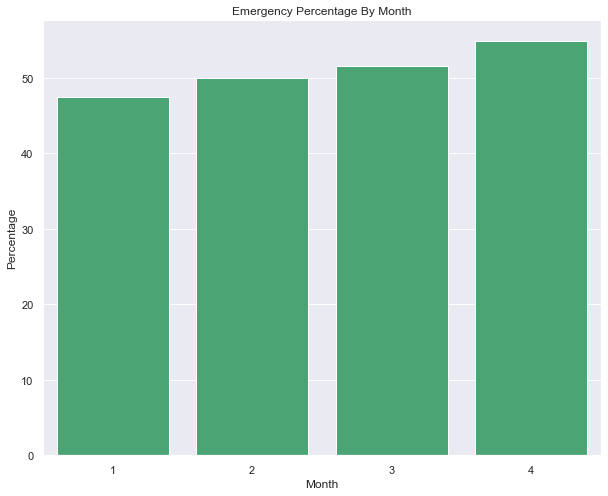

In [11]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Month", y = "mean", order = mth_grp["Month"] \
                                            , data = mth_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Month")
plt.ylabel("Percentage")
plt.xlabel("Month")

## Hour

### Percentage of Hours Contributing to Real Emergencies

In [15]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

hr_by_emer = london.loc[mask, "Hour"].value_counts() / london[mask].shape[0] * 100

hr_by_emer = pd.DataFrame(hr_by_emer).reset_index().rename(columns ={"index": "Hour", "Hour" : "Percentage"})
hr_by_emer

,Hour,Percentage
0,18,7.199941
1,19,7.067967
2,17,6.430090
3,16,6.136814
4,15,6.092822
5,20,5.821541
6,14,5.542928
7,13,5.396290
8,21,4.978371
9,12,4.787741


Text(0.5, 0, 'Percentage')

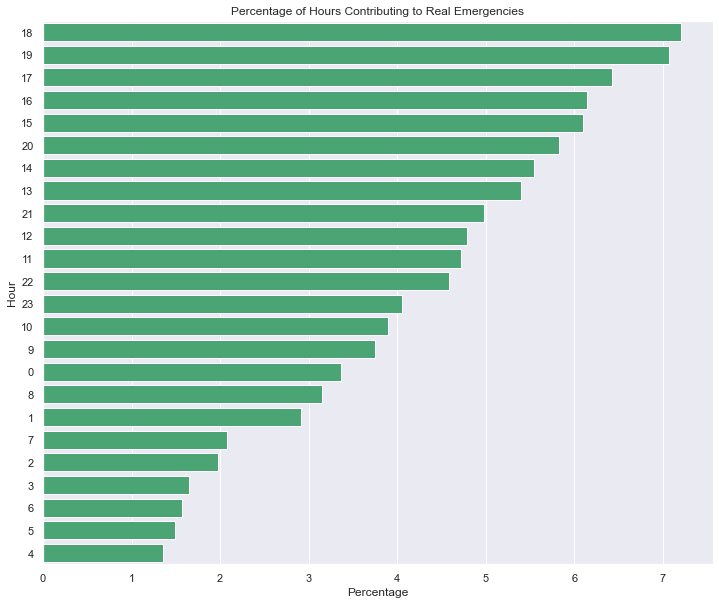

In [16]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(12,10)})
sns.barplot(x="Percentage", y = "Hour", order = hr_by_emer["Hour"] \
                                            , data = hr_by_emer, color = "mediumseagreen")
plt.title("Percentage of Hours Contributing to Real Emergencies")
plt.ylabel("Hour")
plt.xlabel("Percentage")

### Emergency Percentage by Hour

In [29]:
hr_grp = london.groupby("Hour")["Emergency"].aggregate(["mean", "sum"])
hr_grp = hr_grp.reset_index()
hr_grp["Hour"] = hr_grp["Hour"].astype(np.int)
hr_grp.sort_values(by = "Hour", inplace = True)
hr_grp["mean"] *= 100
hr_grp

,Hour,mean,sum
0,0,56.181151,459
1,1,54.532967,397
12,2,48.381295,269
17,3,48.283262,225
18,4,47.557841,185
19,5,46.666667,203
20,6,39.925373,214
21,7,39.226519,284
22,8,43.158954,429
23,9,44.329004,512


Text(0.5, 0, 'Hour')

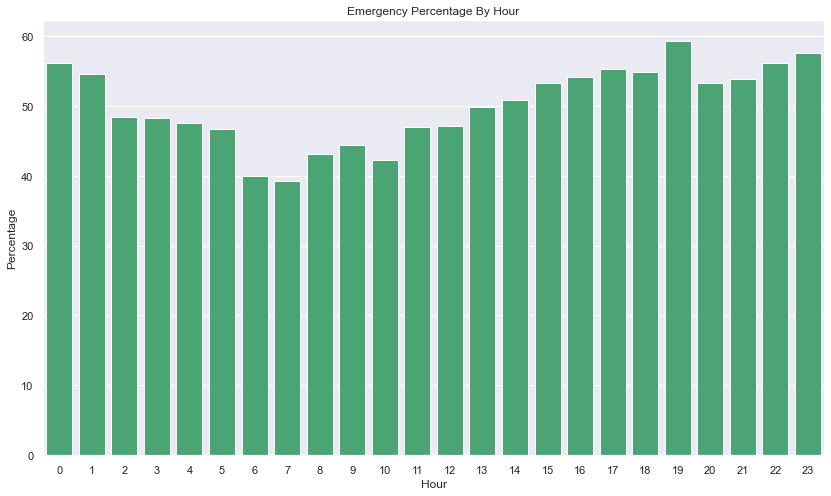

In [30]:
#Make a bar chart of the results
hr_grp["Hour"] = hr_grp["Hour"].astype(np.str)
sns.set(rc = {'figure.figsize':(14,8)})
sns.barplot(x="Hour", y = "mean", order = hr_grp["Hour"] \
                                            , data = hr_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Hour")
plt.ylabel("Percentage")
plt.xlabel("Hour")

## Property Category

### Percentage of Properties Contributing to Real Emergencies

In [31]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

pc_by_emer = london.loc[mask, "property_category"].value_counts() / london[mask].shape[0] * 100

pc_by_emer = pd.DataFrame(pc_by_emer).reset_index().rename(columns ={"index": "property_category", "property_category" : "Percentage"})
pc_by_emer

,property_category,Percentage
0,Residential,52.056602
1,Outdoor,22.963560
2,Vehicle,14.854461
3,Non Residential,10.125376


Text(0.5, 0, 'Percentage')

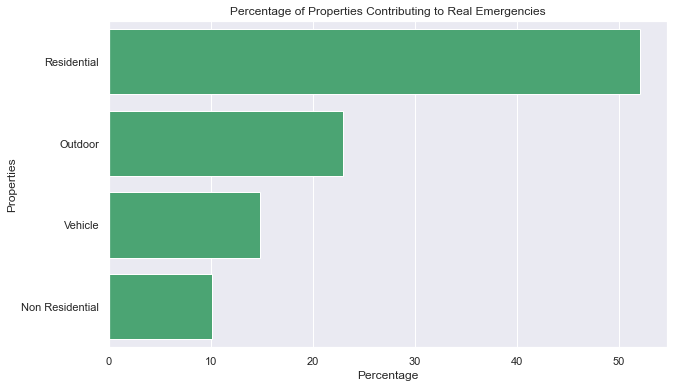

In [32]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(x="Percentage", y = "property_category", order = pc_by_emer["property_category"] \
                                            , data = pc_by_emer, color = "mediumseagreen")
plt.title("Percentage of Properties Contributing to Real Emergencies")
plt.ylabel("Properties")
plt.xlabel("Percentage")

### Emergency Percentage by Property Category

In [33]:
pc_grp = london.groupby("property_category")["Emergency"].aggregate(["mean", "sum"])
pc_grp = pc_grp.reset_index().sort_values(by = "mean", ascending=False)
pc_grp["mean"] *= 100
pc_grp

,property_category,mean,sum
3,Vehicle,88.394415,2026
1,Outdoor,82.725832,3132
2,Residential,49.982401,7100
0,Non Residential,21.457427,1381


Text(0.5, 0, 'Percentage')

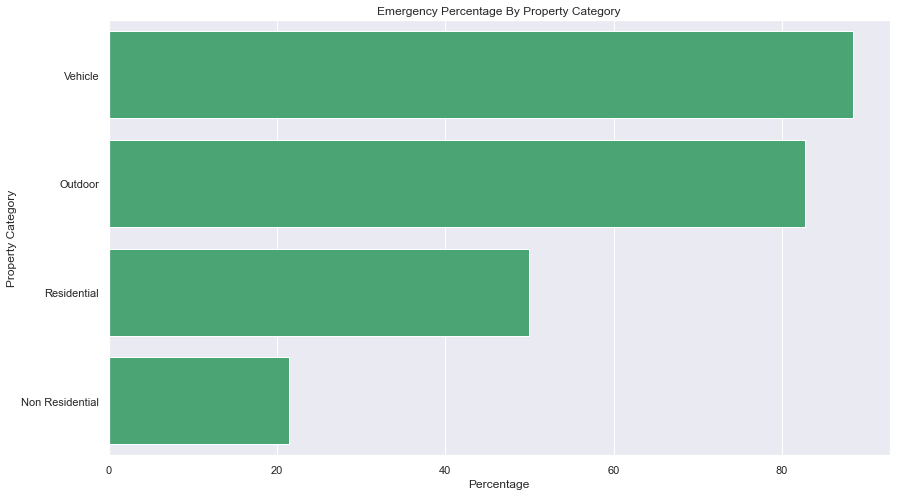

In [34]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(14,8)})
sns.barplot(x="mean", y = "property_category", order = pc_grp["property_category"] \
                                            , data = pc_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Property Category")
plt.ylabel("Property Category")
plt.xlabel("Percentage")

## Ranked Property Types

### Percentage of Ranked Property Types Contributing to Real Emergencies

In [35]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

pt_by_emer = london.loc[mask, "pt_rank"].value_counts() / london[mask].shape[0] * 100

pt_by_emer = pd.DataFrame(pt_by_emer).reset_index().rename(columns ={"index": "property_type_rank", "pt_rank" : "Percentage"})
pt_by_emer

,property_type_rank,Percentage
0,5,27.091429
1,6,24.833199
2,8,24.019356
3,9,8.475695
4,1,5.550260
5,7,3.563311
6,3,2.412200
7,2,2.360877
8,4,0.718528
9,10,0.674536


Text(0.5, 0, 'Percentage')

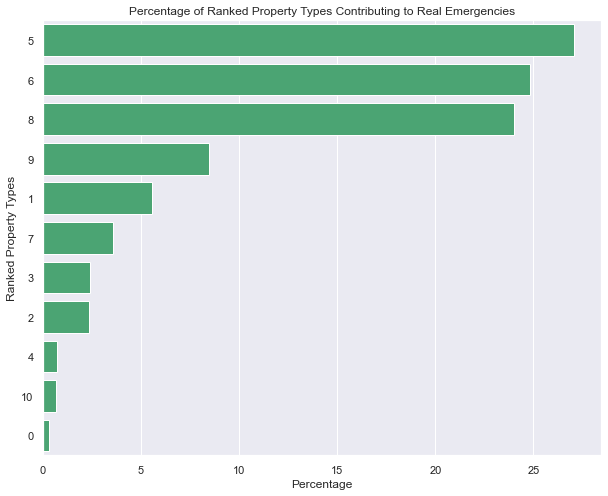

In [36]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Percentage", y = "property_type_rank", order = pt_by_emer["property_type_rank"] \
                                            , data = pt_by_emer, color = "mediumseagreen")
plt.title("Percentage of Ranked Property Types Contributing to Real Emergencies")
plt.ylabel("Ranked Property Types")
plt.xlabel("Percentage")

### Emergency Percentage by Ranked Ward Names

In [37]:
pt_grp = london.groupby("pt_rank")["Emergency"].aggregate(["mean", "sum"])
pt_grp = pt_grp.reset_index().sort_values(by = "mean", ascending=False)
pt_grp["mean"] *= 100
pt_grp

,pt_rank,mean,sum
3,10,100.000000,92
11,9,95.933610,1156
10,8,86.804452,3276
9,7,77.388535,486
8,6,63.379491,3387
7,5,54.474421,3695
6,4,41.176471,98
5,3,34.631579,329
4,2,25.294580,322
2,1,13.334508,757


Text(0.5, 0, 'Percentage')

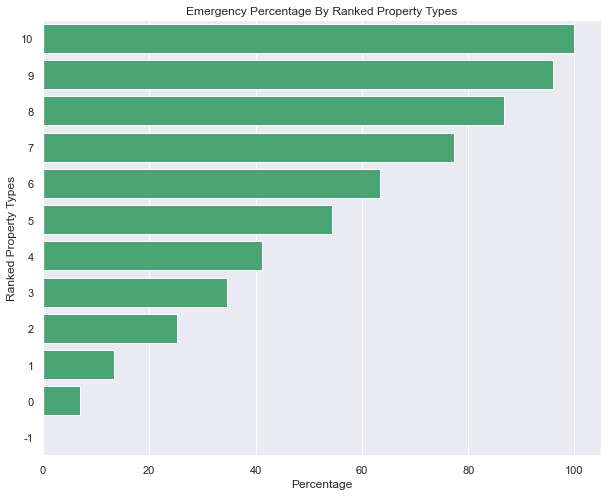

In [38]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="mean", y = "pt_rank", order = pt_grp["pt_rank"] \
                                            , data = pt_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Ranked Property Types")
plt.ylabel("Ranked Property Types")
plt.xlabel("Percentage")

## Address Qualifier

### Percentage of Addresses Contributing to Real Emergencies

In [39]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

aq_by_emer = london.loc[mask, "address_qualifier"].value_counts() / london[mask].shape[0] * 100

aq_by_emer = pd.DataFrame(aq_by_emer).reset_index().rename(columns ={"index": "address_qualifier", "address_qualifier" : "Percentage"})
aq_by_emer

,address_qualifier,Percentage
0,Correct incident location,49.035853
1,Gazetter,24.657233
2,Within same building,14.333895
3,On land associated with building,10.125376
4,Nearby Address,1.129115
5,Other,0.718528


Text(0.5, 0, 'Percentage')

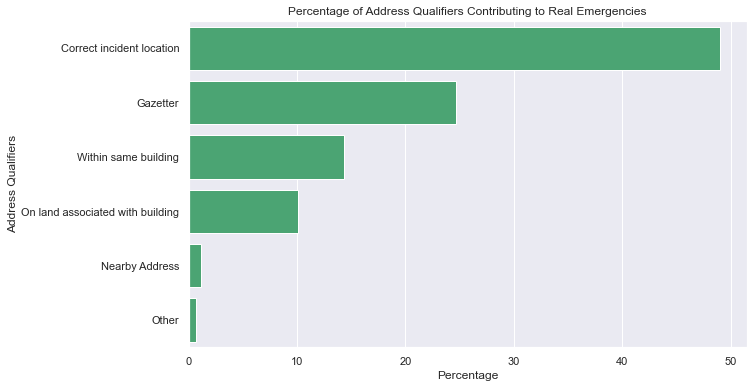

In [40]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,6)})
sns.barplot(x="Percentage", y = "address_qualifier", order = aq_by_emer["address_qualifier"] \
                                            , data = aq_by_emer, color = "mediumseagreen")
plt.title("Percentage of Address Qualifiers Contributing to Real Emergencies")
plt.ylabel("Address Qualifiers")
plt.xlabel("Percentage")

### Emergency Percentage by Addresses

In [41]:
aq_grp = london.groupby("address_qualifier")["Emergency"].aggregate(["mean", "sum"])
aq_grp = aq_grp.reset_index().sort_values(by = "mean", ascending=False)
aq_grp["mean"] *= 100
aq_grp

,address_qualifier,mean,sum
1,Gazetter,87.056692,3363
3,On land associated with building,79.140401,1381
4,Other,73.134328,98
2,Nearby Address,68.750000,154
0,Correct incident location,41.734789,6688
5,Within same building,41.349408,1955


Text(0.5, 0, 'Percentage')

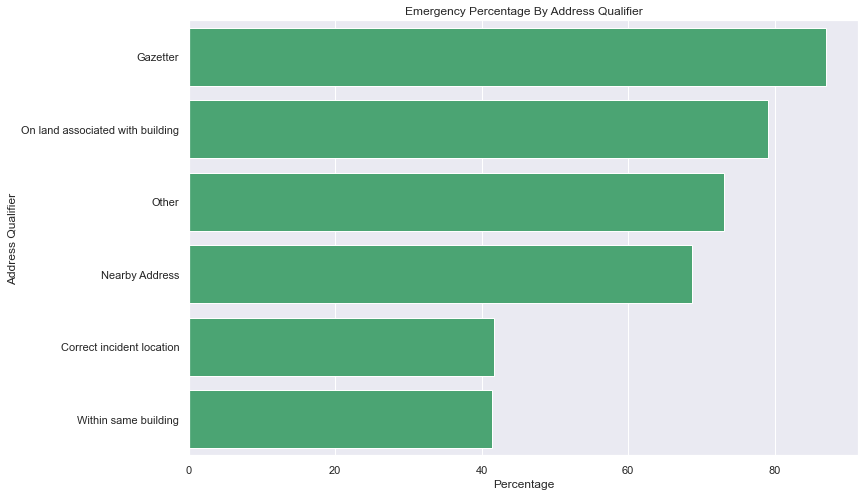

In [43]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(12,8)})
sns.barplot(x="mean", y = "address_qualifier", order = aq_grp["address_qualifier"] \
                                            , data = aq_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Address Qualifier")
plt.ylabel("Address Qualifier")
plt.xlabel("Percentage")

## Boroughs

### Percentage of Boroughs Contributing to Real Emergencies

In [44]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

b_by_emer = london.loc[mask, "borough_name"].value_counts() / london[mask].shape[0] * 100

b_by_emer = pd.DataFrame(b_by_emer).reset_index().rename(columns ={"index": "borough_name", "borough_name" : "Percentage"})
b_by_emer

,borough_name,Percentage
0,LAMBETH,4.956375
1,WESTMINSTER,4.927047
2,SOUTHWARK,4.655767
3,TOWER HAMLETS,4.597111
4,NEWHAM,4.215852
5,CROYDON,4.171860
6,HACKNEY,3.995894
7,ENFIELD,3.790600
8,CAMDEN,3.651294
9,GREENWICH,3.629298


Text(0.5, 0, 'Percentage')

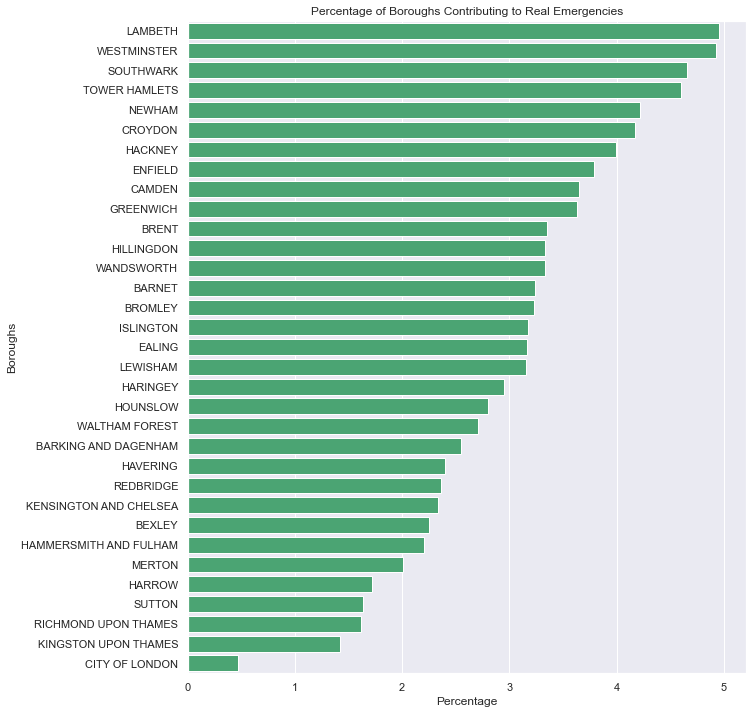

In [45]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,12)})
sns.barplot(x="Percentage", y = "borough_name", order = b_by_emer["borough_name"] \
                                            , data = b_by_emer, color = "mediumseagreen")
plt.title("Percentage of Boroughs Contributing to Real Emergencies")
plt.ylabel("Boroughs")
plt.xlabel("Percentage")

### Emergency Percentage by Boroughs

In [46]:
b_grp = london.groupby("borough_name")["Emergency"].aggregate(["mean", "sum"])
b_grp = b_grp.reset_index().sort_values(by = "mean", ascending=False)
b_grp["mean"] *= 100
b_grp

,borough_name,mean,sum
0,BARKING AND DAGENHAM,64.925373,348
24,NEWHAM,64.825254,575
9,ENFIELD,61.620977,517
4,BROMLEY,59.594595,441
10,GREENWICH,58.166863,495
21,LAMBETH,58.125537,676
7,CROYDON,57.766497,569
29,TOWER HAMLETS,56.334232,627
2,BEXLEY,56.227106,307
3,BRENT,55.936353,457


Text(0.5, 0, 'Percentage')

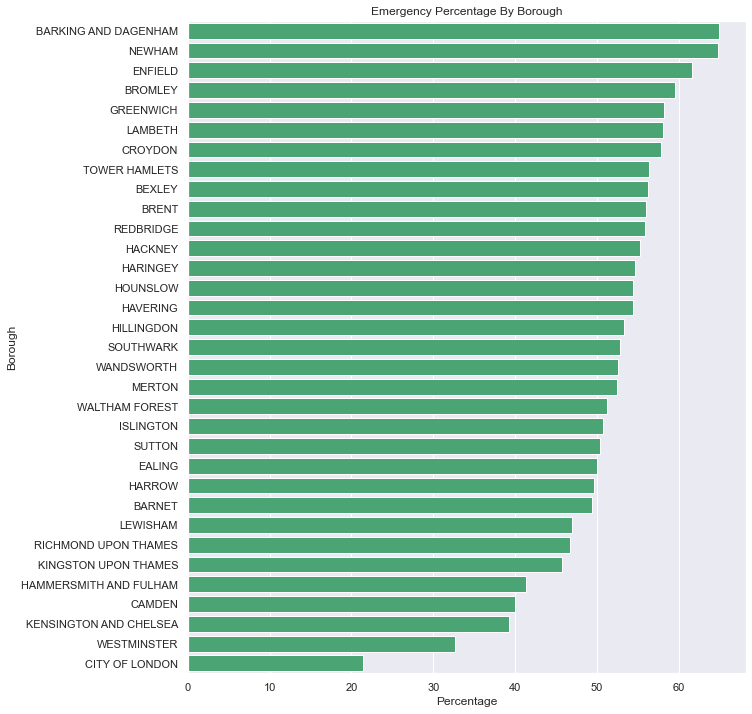

In [47]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,12)})
sns.barplot(x="mean", y = "borough_name", order = b_grp["borough_name"] \
                                            , data = b_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Borough")
plt.ylabel("Borough")
plt.xlabel("Percentage")

## Ranked Ward Names

### Percentage of Ranked Wards Contributing to Real Emergencies

In [48]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

wn_by_emer = london.loc[mask, "wn_rank"].value_counts() / london[mask].shape[0] * 100

wn_by_emer = pd.DataFrame(wn_by_emer).reset_index().rename(columns ={"index": "ward_name_rank", "wn_rank" : "Percentage"})
wn_by_emer

,ward_name_rank,Percentage
0,5,31.739864
1,6,24.012024
2,4,19.392917
3,7,10.799912
4,3,8.204414
5,2,3.614635
6,8,1.950290
7,1,0.263949
8,0,0.021996


Text(0.5, 0, 'Percentage')

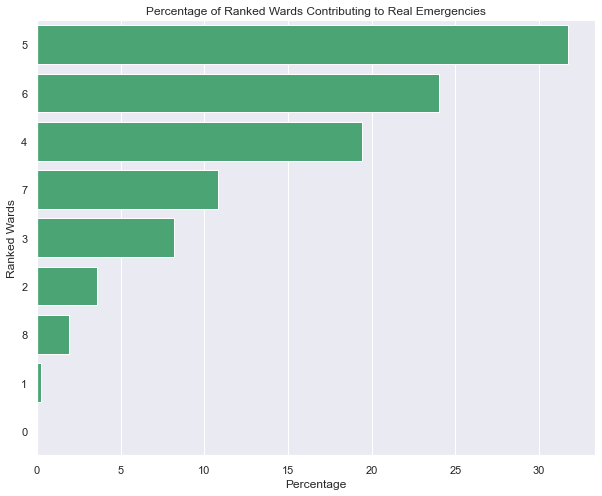

In [49]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Percentage", y = "ward_name_rank", order = wn_by_emer["ward_name_rank"] \
                                            , data = wn_by_emer, color = "mediumseagreen")
plt.title("Percentage of Ranked Wards Contributing to Real Emergencies")
plt.ylabel("Ranked Wards")
plt.xlabel("Percentage")

### Emergency Percentage by Ranked Ward Names

In [50]:
wn_grp = london.groupby("wn_rank")["Emergency"].aggregate(["mean", "sum"])
wn_grp = wn_grp.reset_index().sort_values(by = "mean", ascending=False)
wn_grp["mean"] *= 100
wn_grp

,wn_rank,mean,sum
9,8,83.385580,266
8,7,74.393939,1473
7,6,64.417781,3275
6,5,54.336639,4329
5,4,44.521124,2645
4,3,34.441367,1119
3,2,26.279318,493
2,1,16.363636,36
1,0,3.896104,3
0,-1,0.000000,0


Text(0.5, 0, 'Percentage')

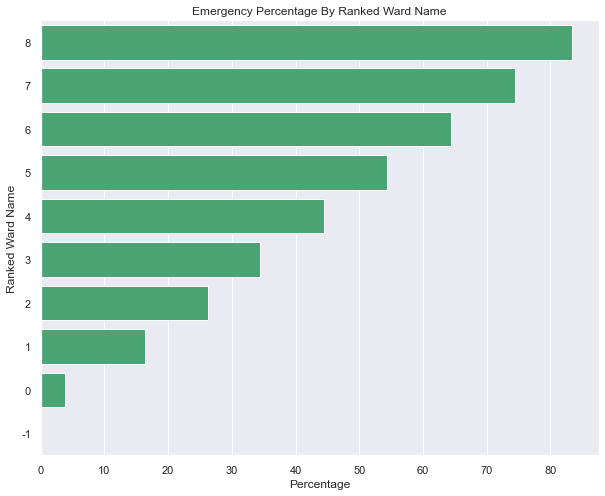

In [51]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="mean", y = "wn_rank", order = wn_grp["wn_rank"] \
                                            , data = wn_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Ranked Ward Name")
plt.ylabel("Ranked Ward Name")
plt.xlabel("Percentage")

## Station Rank

### Percentage of Ranked Stations Contributing to Real Emergencies

In [52]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

st_by_emer = london.loc[mask, "stat_rank"].value_counts() / london[mask].shape[0] * 100

st_by_emer = pd.DataFrame(st_by_emer).reset_index().rename(columns ={"index": "station_rank", "stat_rank" : "Percentage"})
st_by_emer

,station_rank,Percentage
0,5,50.502236
1,4,23.733412
2,6,17.926534
3,3,4.538456
4,2,2.206907
5,7,1.085124
6,10,0.007332


Text(0.5, 0, 'Percentage')

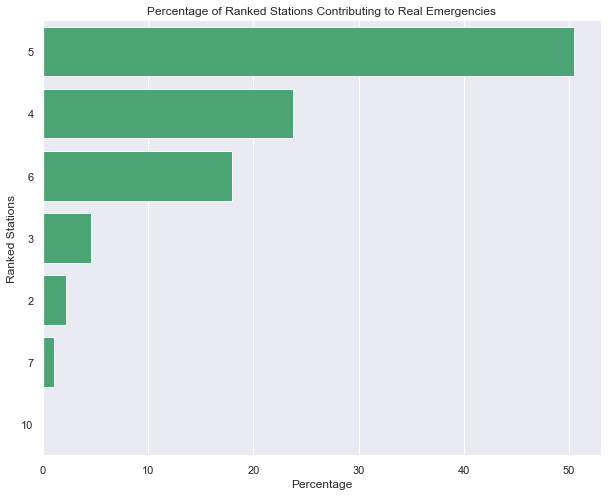

In [53]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Percentage", y = "station_rank", order = st_by_emer["station_rank"] \
                                            , data = st_by_emer, color = "mediumseagreen")
plt.title("Percentage of Ranked Stations Contributing to Real Emergencies")
plt.ylabel("Ranked Stations")
plt.xlabel("Percentage")

### Emergency Percentage by Ranked Stations

In [54]:
st_grp = london.groupby("stat_rank")["Emergency"].aggregate(["mean", "sum"])
st_grp = st_grp.reset_index().sort_values(by = "mean", ascending=False)
st_grp["mean"] *= 100
st_grp

,stat_rank,mean,sum
0,10,100.000000,1
6,7,71.844660,148
5,6,63.754889,2445
4,5,54.805856,6888
3,4,44.173035,3237
2,3,35.533869,619
1,2,28.970164,301


Text(0.5, 0, 'Percentage')

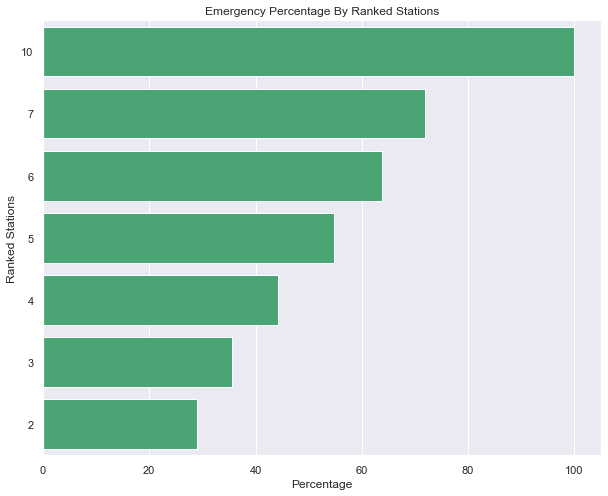

In [55]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="mean", y = "stat_rank", order = st_grp["stat_rank"] \
                                            , data = st_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Ranked Stations")
plt.ylabel("Ranked Stations")
plt.xlabel("Percentage")

## Pump Arriving Time

### Histogram of Pump Arriving Time

In [56]:
london["first_time"].describe()

count    26719.000000
mean       313.604572
std        120.928801
min          2.000000
25%        236.000000
50%        299.000000
75%        372.000000
max        860.000000
Name: first_time, dtype: float64

Text(0.5, 0, 'Time')

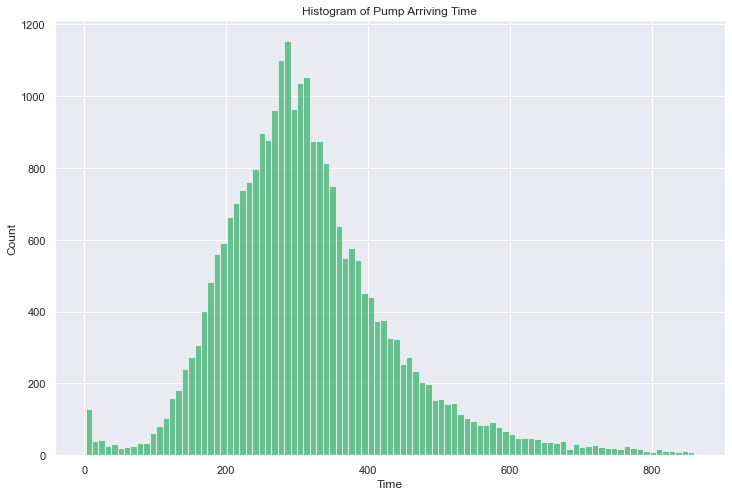

In [57]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.histplot(x="first_time", data = london, color = "mediumseagreen")
plt.title("Histogram of Pump Arriving Time")
plt.xlabel("Time")

### Histogram of Pump Arriving Time By Emergency Status

Text(0.5, 1.0, 'Pump Arriving Time By Emergency Status')

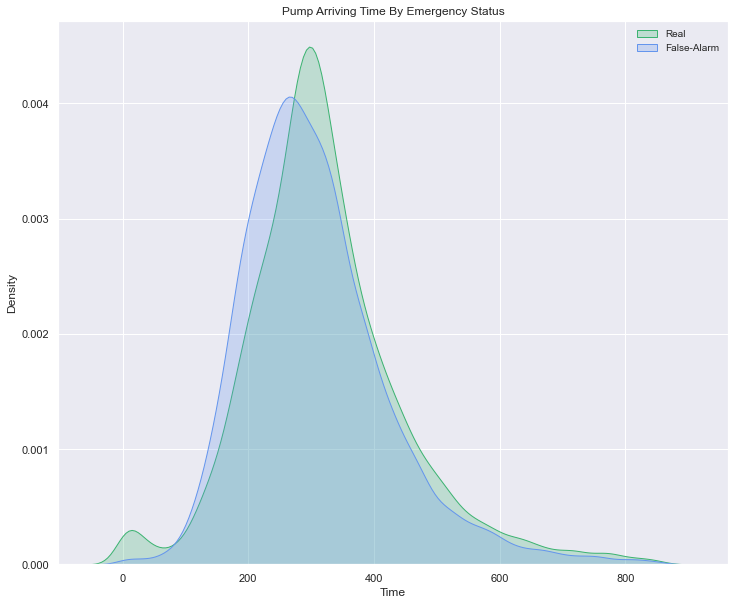

In [58]:
sns.set(rc = {'figure.figsize':(12,10)})
sns.kdeplot(london.loc[london["Emergency"] == 1, "first_time"], shade=True, color = 'mediumseagreen')
sns.kdeplot(london.loc[london["Emergency"] == 0, "first_time"], shade=True, color = 'cornflowerblue')
plt.legend(["Real", "False-Alarm"], frameon=False, fontsize='small')
plt.xlabel("Time")
plt.title("Pump Arriving Time By Emergency Status")

## Number of Stations with Pumps Attending

### Percentage of Pumps Contributing to Real Emergencies

In [7]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

np_by_emer = london.loc[mask, "station_pumps"].value_counts() / london[mask].shape[0] * 100

np_by_emer = pd.DataFrame(np_by_emer).reset_index().rename(columns ={"index": "station_pumps", "station_pumps" : "Percentage"})
np_by_emer

,station_pumps,Percentage
0,1.0,81.472249
1,2.0,15.594985
2,3.0,2.148251
3,4.0,0.784515


Text(0.5, 0, 'Percentage')

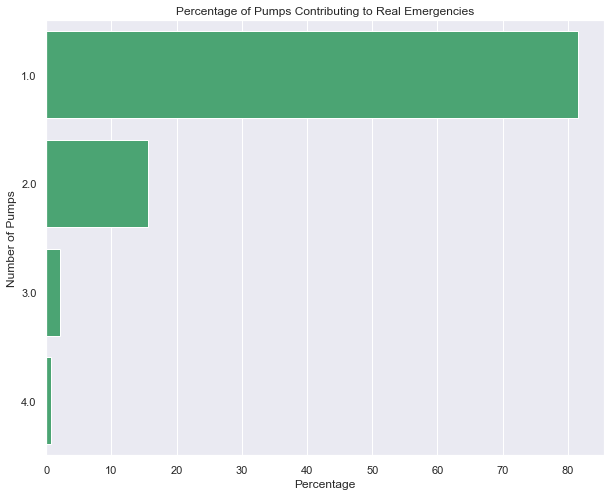

In [8]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Percentage", y = "station_pumps", order = np_by_emer["station_pumps"] \
                                            , data = np_by_emer, color = "mediumseagreen")
plt.title("Percentage of Pumps Contributing to Real Emergencies")
plt.ylabel("Number of Pumps")
plt.xlabel("Percentage")

### Emergency Percentage by Number of Pumps

In [11]:
np_grp = london.groupby("station_pumps")["Emergency"].aggregate(["mean", "sum"])
np_grp = np_grp.reset_index().sort_values(by = "mean", ascending=False)
np_grp["mean"] *= 100
np_grp

,station_pumps,mean,sum
0,1.0,59.150431,11112
3,4.0,36.271186,107
2,3.0,34.551887,293
1,2.0,31.325479,2127


Text(0.5, 0, 'Percentage')

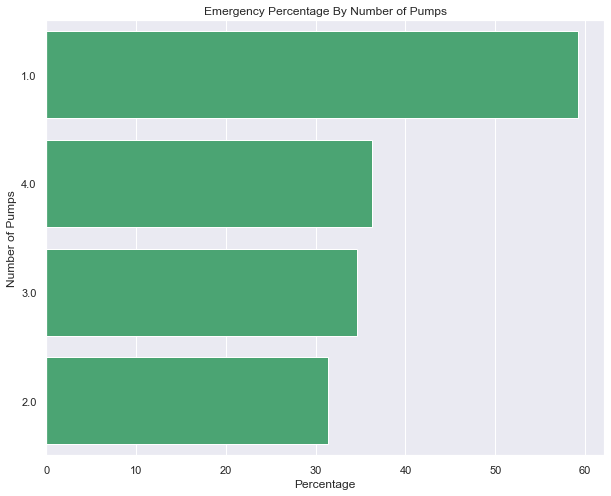

In [12]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="mean", y = "station_pumps", order = np_grp["station_pumps"] \
                                            , data = np_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Number of Pumps")
plt.ylabel("Number of Pumps")
plt.xlabel("Percentage")

## Number of Pumps Attending

### Percentage of Pumps Attending Contributing to Real Emergencies

In [13]:
#Create boolean for only incidents that resulted in an emergency
mask = london["Emergency"] == 1

pa_by_emer = london.loc[mask, "pumps_attending"].value_counts() / london[mask].shape[0] * 100

pa_by_emer = pd.DataFrame(pa_by_emer).reset_index().rename(columns ={"index": "pumps_attending", "pumps_attending" : "Percentage"})
pa_by_emer

,pumps_attending,Percentage
0,1.0,72.952563
1,2.0,21.299215
2,3.0,3.841924
3,4.0,1.906298


Text(0.5, 0, 'Percentage')

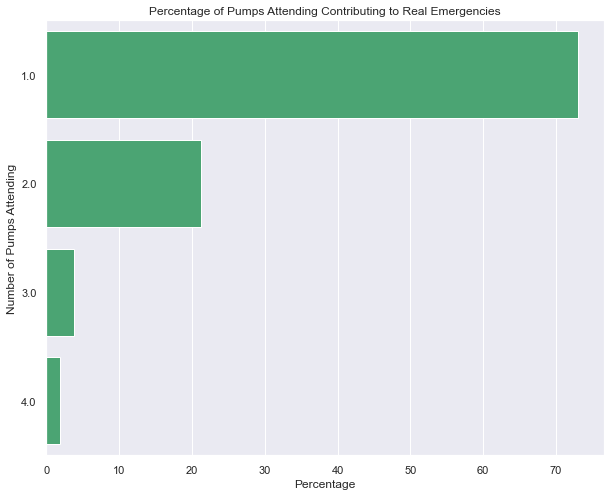

In [14]:
#Make a bar chart of the results
pa_by_emer["pumps_attending"] = pa_by_emer["pumps_attending"].astype(np.str)
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="Percentage", y = "pumps_attending", order = pa_by_emer["pumps_attending"] \
                                            , data = pa_by_emer, color = "mediumseagreen")
plt.title("Percentage of Pumps Attending Contributing to Real Emergencies")
plt.ylabel("Number of Pumps Attending")
plt.xlabel("Percentage")

### Emergency Percentage by Number of Pumps Attending

In [15]:
pa_grp = london.groupby("pumps_attending")["Emergency"].aggregate(["mean", "sum"])
pa_grp = pa_grp.reset_index().sort_values(by = "mean", ascending=False)
pa_grp["mean"] *= 100
pa_grp

,pumps_attending,mean,sum
0,1.0,64.003602,9950
3,4.0,37.089872,260
2,3.0,32.873275,524
1,2.0,32.721334,2905


Text(0.5, 0, 'Percentage')

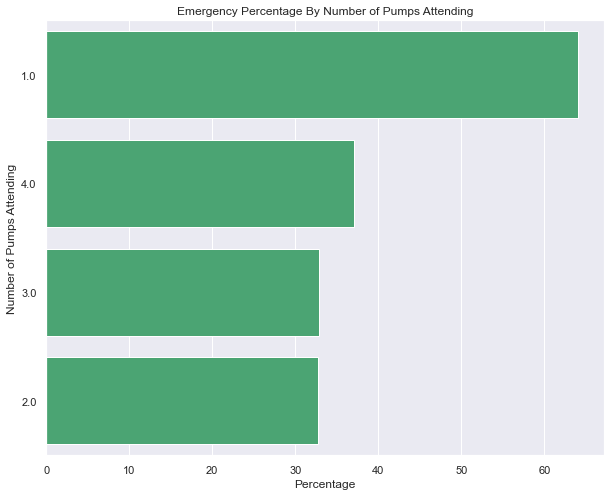

In [16]:
#Make a bar chart of the results
sns.set(rc = {'figure.figsize':(10,8)})
sns.barplot(x="mean", y = "pumps_attending", order = pa_grp["pumps_attending"] \
                                            , data = pa_grp, color = "mediumseagreen")
plt.title("Emergency Percentage By Number of Pumps Attending")
plt.ylabel("Number of Pumps Attending")
plt.xlabel("Percentage")